# Least Squares Approximation

In practice, when trying to solve a linear system of equations $Ax=b$, there may not be an exact solution. One way to find an 'almost solution' is to find the vector $x'$ such that $\lVert Ax'-b \rVert_2$ is minimized, where $A$ is a full rank $m \times n$ matrix such that $m\geq n$. This least squares solution which works by minimizing the sum of the squares of the differences between the entries of $Ax'$ and $b$ and thus solving the solution $Ax=b$ as closely as possible.

If the system has an exact solution, $x'$ is precisely the value of $x$ that solves the system. The reasoning is as follows:

The system is solvable, so there is a vector $x$, such that $Ax=b$. Equivalently, there is a vector $x$ such that $Ax-b = 0$. Then, we have $\lVert Ax-b \rVert_2 = 0$. The L2 norm is nonnegative for all its inputs by definition, so the smallest value it can take is $0$. Thus, $x$ is the vector that minimizes the expression.

In this notebook, we will generate random systems, find least-squares approximations using deterministic and randomized methods, and then compare the results.

In [1]:
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
dims = np.arange(100, 2000, step=50) # dimensions of the random systems

### Deterministic QR-based Least Squares Solver

In [3]:
def ls(dims):
    """Calculates exact least-squares solution to a linear system using QR-based method."""
    times = []
    errors = []
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)

        start = perf_counter()

        q,r = np.linalg.qr(A)
        qt = np.transpose(q)
        c = qt @ b

        rinv = np.linalg.inv(r)
        xls = rinv @ c

        end = perf_counter()
        times.append(end - start)
        errors.append(np.linalg.norm(A@xls - b))
 
    return times, errors

#### Deterministic Results

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:26<00:00,  1.46it/s]


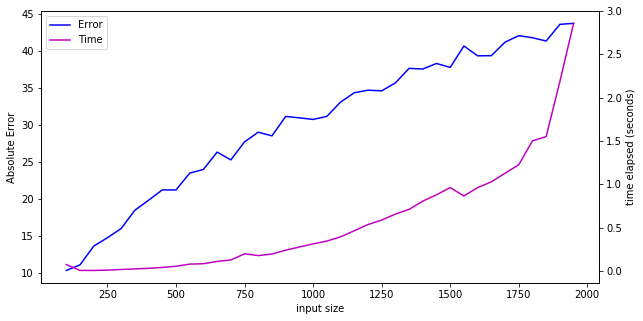

In [4]:
times, errors = ls(dims)
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('input size')

lns1 = ax.plot(dims, errors, c= 'b', label='Error')
ax.set_ylabel('Absolute Error')
ax1=ax.twinx()
ax1.set_ylabel('time elapsed (seconds)')
lns2 = ax1.plot(dims,times, c = 'm', label = 'Time')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.show()

### Naive Randomized Least Squares Solver

In [5]:
def rls(dims):
    """Calculates approximate least-squares solution to a linear system using randomized method."""
    times = []
    errors = []
    iterations = 100
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)
        def calc_norm(x):
            return np.linalg.norm(A@x - b)
        x_sol = np.random.randn(n,1)
        start = perf_counter()
        for i in range(iterations):
            x = np.random.randn(n,1)
            x_sol = min(x,x_sol,key = calc_norm)
        end = perf_counter()
        times.append(end - start)
        errors.append(np.linalg.norm(A@x_sol - b))
    return times, errors

#### Randomized Results

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:20<00:00,  1.87it/s]


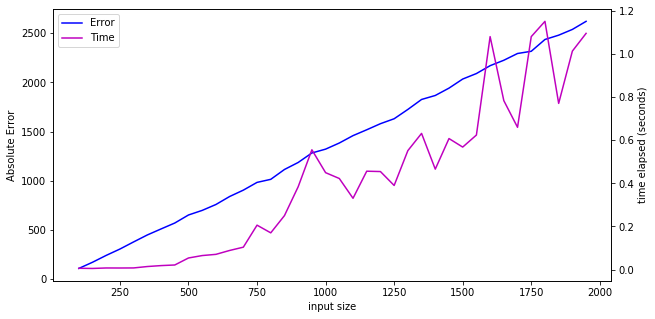

In [6]:
times2, errors2 = rls(dims)
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('input size')

lns1 = ax.plot(dims, errors2, c= 'b', label='Error')
ax.set_ylabel('Absolute Error')
ax1=ax.twinx()
ax1.set_ylabel('time elapsed (seconds)')
lns2 = ax1.plot(dims,times2, c = 'm', label = 'Time')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.show()

### Conclusion

The naive randomized method we designed fails to compete with the optimal deterministic algorithm. This example shows us that randomness isn't a tool that can be used blindly -- there are cases where the naive randomized algorithm will work perfectly, but in general, the use of randomness will have to be more structured and measured.